In [ ]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import date, datetime, timedelta
from scipy import stats
import yfinance as yf
yf.pdr_override()

In [ ]:
stock_prices = [x for x in range(0, 200, 1)]
call_strike_long_strangle = 110
put_strike_long_strangle = 90
premium_long_strangle = 10

In [ ]:
long_call_payoff_strangle = [(max(x - call_strike_long_strangle, 0) - premium_long_strangle) for x in stock_prices]
long_put_payoff_strangle = [(max(put_strike_long_strangle - x, 0) - premium_long_strangle) for x in stock_prices]
total_payoff_long_strangle = [long_call_payoff_strangle[i] + long_put_payoff_strangle[i] for i in range(len(stock_prices))]

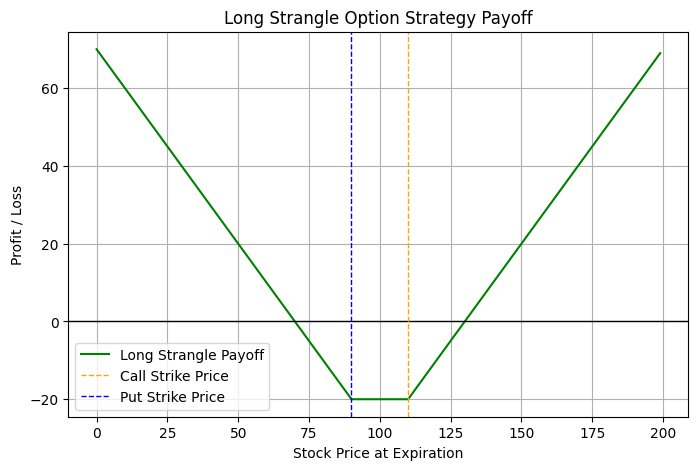

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(stock_prices, total_payoff_long_strangle, label='Long Strangle Payoff', color='green')
plt.axhline(0, color='black', lw=1)
plt.axvline(call_strike_long_strangle, color='orange', linestyle='--', lw=1, label='Call Strike Price')
plt.axvline(put_strike_long_strangle, color='blue', linestyle='--', lw=1, label='Put Strike Price')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit / Loss')
plt.title('Long Strangle Option Strategy Payoff')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
stock_prices = [x for x in range(0, 200, 1)]

stock_prices = np.arange(0, 200, 1)

sell_call_strike_backspread, buy_call_strike_backspread = 90, 110
sell_call_premium_backspread, buy_call_premium_backspread = 10, 8

net_premium_backspread = sell_call_premium_backspread - 2 * buy_call_premium_backspread

In [ ]:
short_call_payoff = np.where(stock_prices <= sell_call_strike_backspread,
                             sell_call_premium_backspread,
                             sell_call_premium_backspread - (stock_prices - sell_call_strike_backspread))

In [ ]:
long_call_backspread_payoff = np.where(stock_prices <= buy_call_strike_backspread,
                                       -2 * buy_call_premium_backspread,
                                       (stock_prices - buy_call_strike_backspread) * 2 - 2 * buy_call_premium_backspread)


In [ ]:
call_backspread_total_payoff = short_call_payoff + long_call_backspread_payoff - net_premium_backspread


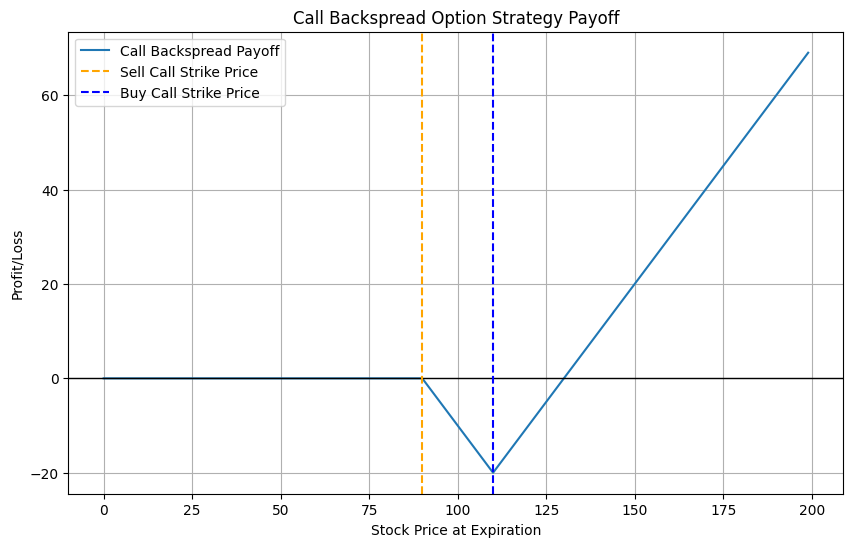

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_backspread_total_payoff, label='Call Backspread Payoff')
plt.axhline(0, color='black', lw=1)
plt.axvline(sell_call_strike_backspread, color='orange', linestyle='--', label='Sell Call Strike Price')
plt.axvline(buy_call_strike_backspread, color='blue', linestyle='--', label='Buy Call Strike Price')
plt.legend()
plt.title('Call Backspread Option Strategy Payoff')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()


The Long Strangle strategy is a tactic used in options trading to capitalize on anticipated significant volatility in an underlying stock's price, without a clear direction. This strategy involves buying both a call option with a higher strike price and a put option with a lower strike price, both expiring on the same date. It becomes profitable if the stock price moves significantly beyond either strike price, exceeding the total cost of the premiums for both options. If the stock price remains between the two strike prices at expiration, the investment is lost to the extent of the premiums paid.

The Call Backspread strategy is employed when an investor expects a sharp rise in the stock price. This approach involves selling a call option at a lower strike price and buying a greater number of call options at a higher strike price. This setup typically results in a net credit for the investor. The strategy aims to limit potential losses to this net credit if the stock price ends below the lower strike price. If the stock price exceeds the higher strike price, the profit potential increases significantly. However, there's a range between the two strike prices where the strategy could incur losses if the stock price settles there at expiration.